<a href="https://colab.research.google.com/github/sachiohappy08/pydata-book/blob/1st-edition/datatamix_day1_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Day１の復習**
#　不動産仲介業者（kaggleネタ)のケースで機械学習編

In [3]:
#必要なライブラリを読み込む　 #google colabでmatplotlibを使う時に記述する（一行目）
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt #グラフを描画するためのライブラリmatplotlibをインポート
import numpy as np #数値計算用のライブラリ
import pandas as pd #データ解析用のライブラリ

matplotlib.style.use('ggplot')#matplotlibには色々なスタイル（デザイン）でグラフを描けるがその一つ。


In [4]:
#google colabによるdriveのマウント
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [12]:
#pandasのcsv読み込みメソッドによるファイルの読み込み
house_data=pd.read_csv('drive/My Drive/Colab_Notebooks/datamix_review/kc_house_data.csv')

In [13]:
#上記読み込んだデータの冒頭だけを見る
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [15]:
#行と列が幾つあるかを確認する #★ここの%は何の意味か確認★
print("Number of Rows: %i | Number of Columns: %i" % house_data.shape)

Number of Rows: 21613 | Number of Columns: 21


In [16]:
#describeメソッドで要約統計量を計算。ここでおかしな数値が紛れてないかを確認する。欠損値、異常な数値など。
house_data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### **データをどうやって可視化するか？（可視化＝グラフなどで見える化）**

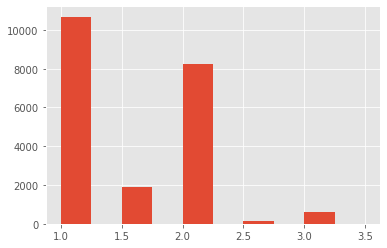

In [21]:
#一つの数値データのばらつきの可視化ならば、ヒストグラムが有効である。以下２つの書き方どちらでもオッケー
house_data['floors'].hist()
#house_data.floors.hist()

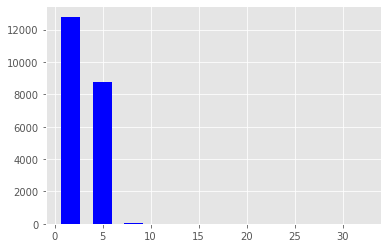

In [36]:
#ベッドルームの数のばらつきを確認して見る場合。カッコの中で色々な条件を指定できる
house_data.bedrooms.hist(rwidth=0.6, color='blue')

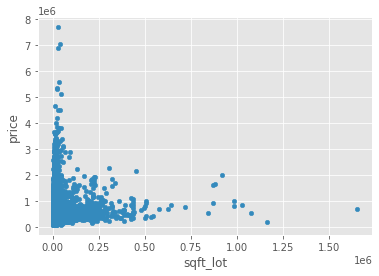

In [32]:
#散布図でグラフを描く場合
house_data.plot(kind='scatter', x='sqft_lot', y='price')

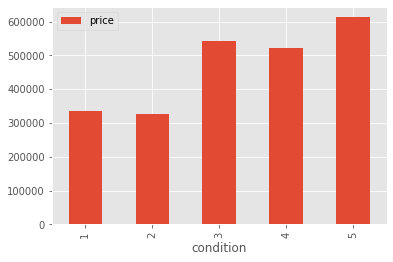

In [35]:
#集計した棒グラフはGroupbyを使う。コンディションはカテゴリ変数だから、この変数をキーにしてpriceの平均を出す。aggregateでconditionごとのpriceの平均を算出している。
price_by_condition = house_data.groupby('condition').aggregate({'price': np.mean}).reset_index()
price_by_condition.plot.bar(x='condition')

### **欠損値を確認する方法**

In [37]:
#col_namesというコラムが複数入る変数を作って、forループで全列のnullを確認する。

col_names = house_data.columns
for col_name in col_names:
    missing_num = sum(pd.isnull(house_data[col_name]))#pd.isnullの戻り値はTrueかFalseだが、sum関数にいれると自動的にTrueは１，Falseは0に変換されるので、欠損値の個数になる
    print(col_name, '; # of missing record: ', missing_num)

id ; # of missing record:  0
date ; # of missing record:  0
price ; # of missing record:  0
bedrooms ; # of missing record:  0
bathrooms ; # of missing record:  0
sqft_living ; # of missing record:  0
sqft_lot ; # of missing record:  0
floors ; # of missing record:  0
waterfront ; # of missing record:  0
view ; # of missing record:  0
condition ; # of missing record:  0
grade ; # of missing record:  0
sqft_above ; # of missing record:  0
sqft_basement ; # of missing record:  0
yr_built ; # of missing record:  0
yr_renovated ; # of missing record:  0
zipcode ; # of missing record:  0
lat ; # of missing record:  0
long ; # of missing record:  0
sqft_living15 ; # of missing record:  0
sqft_lot15 ; # of missing record:  0


### 新しい特徴量を作る、Feature Engineeringのためのpandasの使い方
当初集めたデータに、ある特徴量を組み合わせて、新しい特徴量を作っていくことを、Feature Engineeringという。ただし、特徴量に目的変数を入れてはいけない。

In [38]:
#たとえば、一つの階の広さという新しい特徴量を作る場合
house_data['sqft_footage_of_each_floor'] = house_data['sqft_living'] / house_data['floors']
#9行で、指定した列の要素だけを抜き出して表示するコード
house_data.iloc[0:9][['id', 'sqft_living', 'floors', 'sqft_footage_of_each_floor']]

,id,sqft_living,floors,sqft_footage_of_each_floor
0,7129300520,1180,1.0,1180.0
1,6414100192,2570,2.0,1285.0
2,5631500400,770,1.0,770.0
3,2487200875,1960,1.0,1960.0
4,1954400510,1680,1.0,1680.0
5,7237550310,5420,1.0,5420.0
6,1321400060,1715,2.0,857.5
7,2008000270,1060,1.0,1060.0
8,2414600126,1780,1.0,1780.0


In [40]:
#関数を使って、既存のカラムから新しいカラムを作る
#dateカラムから年と月を取り出して新しいカラムを作る
def date_str2year(x):
    #最初の４文字を抽出して返す関数
    return int(x[:4])

def date_str2month(x):
    #途中の２文字を抽出して返す関数
    return int(x[4:6])

In [41]:
#上の関数を設定したら以下でapplyして新しいdate_year, date_monthというカラムを作る。
house_data['date_year'] = house_data['date'].apply(date_str2year)
house_data['date_month'] = house_data['date'].apply(date_str2month)
house_data.iloc[0:100][['id','date', 'date_year', 'date_month']]

,id,date,date_year,date_month
0,7129300520,20141013T000000,2014,10
1,6414100192,20141209T000000,2014,12
2,5631500400,20150225T000000,2015,2
3,2487200875,20141209T000000,2014,12
4,1954400510,20150218T000000,2015,2
...,...,...,...,...
95,1483300570,20140908T000000,2014,9
96,3422049190,20150330T000000,2015,3
97,1099611230,20140912T000000,2014,9
98,722079104,20140711T000000,2014,7


In [42]:
#カテゴリ変数は、機械学習させる時には基本的にダミー変数へと置き換える場合が多い。
house_data = pd.get_dummies(data=house_data, columns=['view'])

In [43]:
#ここで作った新しい特徴量がカラムの最後に追加されている
house_data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_footage_of_each_floor,date_year,date_month,view_0,view_1,view_2,view_3,view_4
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1180.0,2014,10,1,0,0,0,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1285.0,2014,12,1,0,0,0,0
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,770.0,2015,2,1,0,0,0,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1960.0,2014,12,1,0,0,0,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1680.0,2015,2,1,0,0,0,0


In [45]:
#新しい特徴量を作る。ここでポイントは、priceは最終的に求めたい数値なので、この特徴量は入れない。
house_data['sqft_living_div_sqft_living15'] =house_data['sqft_living'] / (house_data['sqft_living15'] + 0.001) #zero division errorを防ぐための数字を入れる。これをスムージングパラメーターという。

In [48]:
#土地の面積に対する家屋の面積、建ぺい率？？
house_data['sqft_living_div_sqft_lot'] =house_data['sqft_living'] / (house_data['sqft_lot'] + 0.001)

### **Scikit Learnを使って機械学習モデルを作る**
各データの残差の２乗の和が最小になるように、直線の傾きと切片を求めることを線形回帰分析といい、　求めた回帰直線のことを線形回帰式や**線形回帰モデル**と呼ぶ。

In [51]:
#線形回帰モデルを試す。モデル評価はRMSE（二乗平均平方根誤差）→予測値と実際の数値の誤差が小さければ、予想が的確である可能性が高い
from sklearn.linear_model import LinearRegression #線形回帰モデルをライブラリで呼び出す
from sklearn.model_selection import train_test_split #トレーニングデータとテストデータを分割させる。
from sklearn.metrics import mean_squared_error #Root Mean Squared Error　２乗平均平方根誤差でモデルを評価するライブラリ

In [56]:
#sklearnにデータを渡す準備をする。ターゲット変数はprice、除くカラムも指定する。feature_colsという特徴量の配列を作り、今回使うコラムをfor文で入れる
target_col = 'price'
exclude_cols = ['price', 'id', 'date']
feature_cols = []
for col in house_data.columns:
  if col not in exclude_cols:
    feature_cols.append(col)
#省略して書くと以下のようにも書ける
#feature_cols = [col for col in dataset.columns if col not in exclude_cols]

In [57]:
feature_cols

['bedrooms',
 'bathrooms',
 'sqft_living',
 'sqft_lot',
 'floors',
 'waterfront',
 'condition',
 'grade',
 'sqft_above',
 'sqft_basement',
 'yr_built',
 'yr_renovated',
 'zipcode',
 'lat',
 'long',
 'sqft_living15',
 'sqft_lot15',
 'sqft_footage_of_each_floor',
 'date_year',
 'date_month',
 'view_0',
 'view_1',
 'view_2',
 'view_3',
 'view_4',
 'sqft_living_div_sqft_living15',
 'sqft_living_div_sqft_lot']

In [58]:
#house_dataの、特徴量カラムで抽出したカラムだけを表示させる
house_data[feature_cols].head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,sqft_footage_of_each_floor,date_year,date_month,view_0,view_1,view_2,view_3,view_4,sqft_living_div_sqft_living15,sqft_living_div_sqft_lot
0,3,1.00,1180,5650,1.0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,1180.0,2014,10,1,0,0,0,0,0.880596,0.208850
1,3,2.25,2570,7242,2.0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1285.0,2014,12,1,0,0,0,0,1.520709,0.354874
2,2,1.00,770,10000,1.0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,770.0,2015,2,1,0,0,0,0,0.283088,0.077000
3,4,3.00,1960,5000,1.0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,1960.0,2014,12,1,0,0,0,0,1.441175,0.392000
4,3,2.00,1680,8080,1.0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,1680.0,2015,2,1,0,0,0,0,0.933333,0.207921


In [59]:
#これは被説明変数（ターゲット変数、目的変数）の冒頭だけ抽出。つまり正しいprice
house_data[target_col].head()

0    221900.0
1    538000.0
2    180000.0
3    604000.0
4    510000.0
Name: price, dtype: float64

In [60]:
#Xに特徴量の行列を入れて、yに被説明変数のベクトル（数字）を入れる
#★なんでXは大文字なのかを知りたい★

y = house_data[target_col]
X = house_data[feature_cols]

In [61]:
#学習データを70％（X_train, y_train）、テストデータを30％（X_test,y_test）に分ける。random_stateで出てくる乱数を固定する
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

### **線形回帰モデル（Linear regression model）を実装していく**

In [62]:
#ライブラリを読み込む
lm = LinearRegression() #線形回帰モデルを初期化する
lm.fit(X_train, y_train) #X_trainとy_trainを使ってモデルの学習。X_trainは学習データの特徴量の行列、y_trainは学習データの目的変数のベクトル
y_pred = lm.predict(X_test) #線形モデルから目的変数を予測 predictメソッドで予測してy_pred変数に入れる。X_testはテストデータの特徴量の行列。y_predに予測値が格納される。
lm_mse = mean_squared_error(y_test, y_pred) #予測値であるy_predと実際のデータであるy_testを答え合わせする
print('LinerRegression RMSE: ', np.sqrt(lm_mse))

LinerRegression RMSE:  193090.0984819826


In [64]:
#回帰係数を取り出す　★回帰係数について深堀りする→よくわかってない
coef_pd = pd.DataFrame(lm.coef_, columns=['coef'], index=feature_cols)
coef_pd

,coef
bedrooms,-25156.526296
bathrooms,39450.217153
sqft_living,239.297418
sqft_lot,0.136205
floors,-107680.255634
waterfront,496659.902674
condition,33212.251304
grade,98157.079866
sqft_above,127.894087
sqft_basement,111.403344
